In [270]:
import tensorflow as tf

In [271]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [272]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is ACC0-1167

 Directory of C:\Users\shand\Documents\Siddy\ExcelR\Assignment\Neural Network

01-02-2022  22:17    <DIR>          .
01-02-2022  04:22    <DIR>          ..
01-02-2022  20:46    <DIR>          .ipynb_checkpoints
01-02-2022  22:01                71 checkpoint
01-02-2022  04:20            46,843 forestfires.csv
01-02-2022  04:21         1,155,536 gas_turbines.csv
01-02-2022  21:44             9,720 mywt.ff.data-00000-of-00001
01-02-2022  21:44             1,584 mywt.ff.index
01-02-2022  22:17           145,992 Neural Network.ipynb
01-02-2022  04:21             1,130 problem statment(Gas turbines).txt
01-02-2022  04:20                61 Problem_statement(fireforests).txt
               8 File(s)      1,360,937 bytes
               3 Dir(s)  208,869,109,760 bytes free


## Forest Fire

In [273]:
forest = pd.read_csv('forestfires.csv')

In [274]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [275]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [276]:
from sklearn.preprocessing import LabelEncoder

In [277]:
le = LabelEncoder()
forest.month = le.fit_transform(forest.month)
forest.day = le.fit_transform(forest.day)
forest.size_category = le.fit_transform(forest.size_category)

In [278]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [279]:
forest.size_category.value_counts()

1    378
0    139
Name: size_category, dtype: int64

In [280]:
x = forest.iloc[:,:11]
y = forest.iloc[:,30]

In [281]:
x

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [282]:
model1 = tf.keras.models.Sequential()

In [283]:
model1.add(tf.keras.layers.Dense(20, input_dim = 11, activation = 'relu'))
model1.add(tf.keras.layers.Dense(15, activation = 'relu'))
model1.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [284]:
model1.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 20)                240       
                                                                 
 dense_76 (Dense)            (None, 15)                315       
                                                                 
 dense_77 (Dense)            (None, 1)                 16        
                                                                 
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [285]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
data = model1.fit(x, y, validation_split = 0.2, epochs = 100, batch_size = 100)

Epoch 1/100
5/5 [==============================] - 1s 61ms/step - loss: 6.7166 - accuracy: 0.3511 - val_loss: 6.2169 - val_accuracy: 0.3654
Epoch 2/100
5/5 [==============================] - 0s 8ms/step - loss: 1.8751 - accuracy: 0.5400 - val_loss: 2.2266 - val_accuracy: 0.4904
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 1.4951 - accuracy: 0.7361 - val_loss: 1.6750 - val_accuracy: 0.5577
Epoch 4/100
5/5 [==============================] - 0s 9ms/step - loss: 1.8303 - accuracy: 0.7433 - val_loss: 1.6054 - val_accuracy: 0.5385
Epoch 5/100
5/5 [==============================] - 0s 11ms/step - loss: 1.5284 - accuracy: 0.7385 - val_loss: 1.9301 - val_accuracy: 0.5288
Epoch 6/100
5/5 [==============================] - 0s 9ms/step - loss: 1.0793 - accuracy: 0.6925 - val_loss: 3.1884 - val_accuracy: 0.3750
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 1.1425 - accuracy: 0.6199 - val_loss: 3.4503 - val_accuracy: 0.3750
Epoch 8/100
5/5 [========

5/5 [==============================] - 0s 6ms/step - loss: 0.3007 - accuracy: 0.8620 - val_loss: 0.3539 - val_accuracy: 0.8462
Epoch 60/100
5/5 [==============================] - 0s 6ms/step - loss: 0.2990 - accuracy: 0.8862 - val_loss: 0.3674 - val_accuracy: 0.8462
Epoch 61/100
5/5 [==============================] - 0s 7ms/step - loss: 0.2960 - accuracy: 0.8765 - val_loss: 0.3522 - val_accuracy: 0.8462
Epoch 62/100
5/5 [==============================] - 0s 5ms/step - loss: 0.2981 - accuracy: 0.8983 - val_loss: 0.3483 - val_accuracy: 0.8462
Epoch 63/100
5/5 [==============================] - 0s 8ms/step - loss: 0.3026 - accuracy: 0.8692 - val_loss: 0.3451 - val_accuracy: 0.8462
Epoch 64/100
5/5 [==============================] - 0s 7ms/step - loss: 0.3037 - accuracy: 0.9031 - val_loss: 0.3581 - val_accuracy: 0.8365
Epoch 65/100
5/5 [==============================] - 0s 6ms/step - loss: 0.2897 - accuracy: 0.8741 - val_loss: 0.3493 - val_accuracy: 0.8365
Epoch 66/100
5/5 [===============

In [286]:
model1.save_weights('mywt.ff')

In [287]:
scores = model1.evaluate(x, y)
print('%s : %2f%%'%(model1.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.2290 - accuracy: 0.9110
accuracy : 91.102517%


In [288]:
model1.history.history.keys()
import matplotlib.pyplot as plt

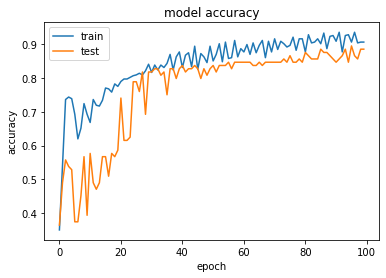

In [289]:
plt.plot(data.history['accuracy'])
plt.plot(data.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

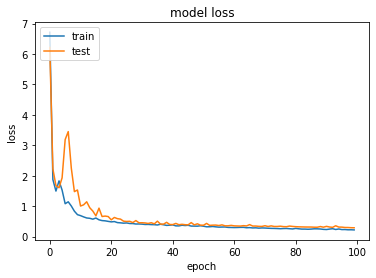

In [290]:
plt.plot(data.history['loss'])
plt.plot(data.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

## Gas Turbines

In [291]:
turbines = pd.read_csv('gas_turbines.csv')

In [292]:
turbines

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [293]:
turbines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [294]:
x = turbines.loc[:,turbines.columns != 'TEY']
y = turbines.iloc[:,7]

In [295]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [296]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [297]:
model2 = tf.keras.models.Sequential()

In [298]:
model2.add(tf.keras.layers.Dense(15, input_dim = 10))
model2.add(tf.keras.layers.Dense(15))
model2.add(tf.keras.layers.Dense(1)) 

In [299]:
model2.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 15)                165       
                                                                 
 dense_79 (Dense)            (None, 15)                240       
                                                                 
 dense_80 (Dense)            (None, 1)                 16        
                                                                 
Total params: 421
Trainable params: 421
Non-trainable params: 0
_________________________________________________________________


In [300]:
model2.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mse','mae'])

In [301]:
df = model2.fit(x, y , validation_split = 0.30, epochs = 100, batch_size = 150)

Epoch 1/100
71/71 [==============================] - 1s 3ms/step - loss: 3855.3340 - mse: 3855.3340 - mae: 39.7842 - val_loss: 373.3837 - val_mse: 373.3837 - val_mae: 15.3059
Epoch 2/100
71/71 [==============================] - 0s 3ms/step - loss: 302.3685 - mse: 302.3685 - mae: 12.7712 - val_loss: 306.4346 - val_mse: 306.4346 - val_mae: 13.3935
Epoch 3/100
71/71 [==============================] - 0s 2ms/step - loss: 284.7769 - mse: 284.7769 - mae: 12.3666 - val_loss: 296.0355 - val_mse: 296.0355 - val_mae: 13.2276
Epoch 4/100
71/71 [==============================] - 0s 2ms/step - loss: 264.7196 - mse: 264.7196 - mae: 11.9256 - val_loss: 306.0062 - val_mse: 306.0062 - val_mae: 13.8077
Epoch 5/100
71/71 [==============================] - 0s 2ms/step - loss: 243.6796 - mse: 243.6796 - mae: 11.4947 - val_loss: 256.7297 - val_mse: 256.7297 - val_mae: 12.3430
Epoch 6/100
71/71 [==============================] - 0s 2ms/step - loss: 221.6652 - mse: 221.6652 - mae: 10.9387 - val_loss: 232.7358

71/71 [==============================] - 0s 2ms/step - loss: 2.0584 - mse: 2.0584 - mae: 1.0973 - val_loss: 2.2420 - val_mse: 2.2420 - val_mae: 1.1142
Epoch 50/100
71/71 [==============================] - 0s 2ms/step - loss: 1.9400 - mse: 1.9400 - mae: 1.0709 - val_loss: 2.7337 - val_mse: 2.7337 - val_mae: 1.2574
Epoch 51/100
71/71 [==============================] - 0s 2ms/step - loss: 1.8931 - mse: 1.8931 - mae: 1.0663 - val_loss: 2.4147 - val_mse: 2.4147 - val_mae: 1.1761
Epoch 52/100
71/71 [==============================] - 0s 2ms/step - loss: 1.7078 - mse: 1.7078 - mae: 1.0091 - val_loss: 1.7437 - val_mse: 1.7437 - val_mae: 1.0223
Epoch 53/100
71/71 [==============================] - 0s 2ms/step - loss: 1.5853 - mse: 1.5853 - mae: 0.9725 - val_loss: 1.8488 - val_mse: 1.8488 - val_mae: 1.0836
Epoch 54/100
71/71 [==============================] - 0s 1ms/step - loss: 1.6572 - mse: 1.6572 - mae: 0.9978 - val_loss: 1.6002 - val_mse: 1.6002 - val_mae: 0.9987
Epoch 55/100
71/71 [=========

Epoch 99/100
71/71 [==============================] - 0s 2ms/step - loss: 1.2740 - mse: 1.2740 - mae: 0.8737 - val_loss: 5.3055 - val_mse: 5.3055 - val_mae: 2.1023
Epoch 100/100
71/71 [==============================] - 0s 2ms/step - loss: 2.4792 - mse: 2.4792 - mae: 1.2865 - val_loss: 0.9463 - val_mse: 0.9463 - val_mae: 0.7716


In [302]:
print(df.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


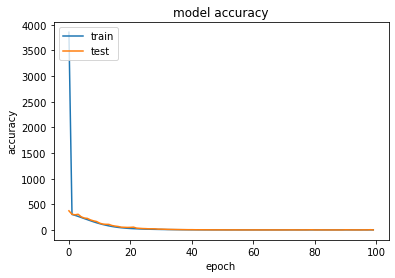

In [303]:
plt.plot(df.history['loss'])
plt.plot(df.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()